# CIFAR-10 Classification using fully connected neural networks

ŸÖ€å‚ÄåÿÆŸàÿßŸá€åŸÖ ⁄ÜŸáÿßÿ± ÿØÿ≥ÿ™Ÿá ÿßŸàŸÑ ÿØ€åÿ™ÿßÿ≥ÿ™ ÿ±ÿß ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØŸá€åŸÖ. ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ŸÖŸàÿ±ÿØ ŸÜÿ∏ÿ± ÿØÿ± ŸÑÿß€åŸá Ÿàÿ±ŸàÿØ€å €±€∞€≤€¥ ŸÜŸàÿ±ŸàŸÜ ÿØÿßÿ±ÿØ. ÿØŸà ŸÑÿß€åŸá ŸÜŸáÿßŸÜ Ÿáÿ± ⁄©ÿØÿßŸÖ ÿ®ÿß €±€∂ ŸÜŸàÿ±ŸàŸÜ Ÿà ŸÑÿß€åŸá ÿÆÿ±Ÿàÿ¨€å €¥ ŸÜŸàÿ±ŸàŸÜ ÿØÿßÿ±ÿØ

ÿßÿ®ÿ™ÿØÿß ÿØ€åÿ™ÿßÿ≥ÿ™ ⁄ØŸÅÿ™Ÿá ÿ¥ÿØŸá ÿ±ÿß ÿØÿßŸÜŸÑŸàÿØ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ

In [31]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 131MB/s] 


Ÿæ⁄©€åÿ¨‚ÄåŸáÿß€å ŸÖŸàÿ±ÿØ ŸÜ€åÿßÿ≤ ÿ±ÿß ÿßÿ∂ÿßŸÅŸá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ

In [32]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random
import pickle
from statistics import mean
import os
import matplotlib.image as mpimg
import time

ÿ®ÿ±ÿß€å ŸÅŸáŸÖ ÿ®Ÿáÿ™ÿ± ŸÖÿ≠ÿ™Ÿàÿß€å ÿØ€åÿ™ÿßÿ≥ÿ™ÿå ÿØŸá ÿ™ÿµŸà€åÿ± ÿßÿ≤ Ÿáÿ± ⁄©ÿØÿßŸÖ ÿßÿ≤ ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å Ÿáÿ± ÿØŸà ŸÅŸàŸÑÿØÿ± ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™ ⁄ÜÿßŸæ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ.



folder: test


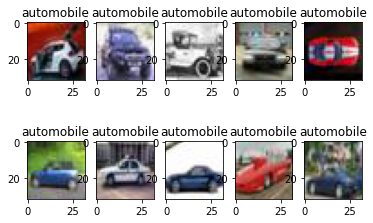

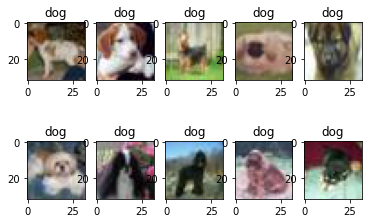

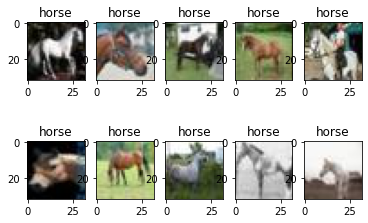

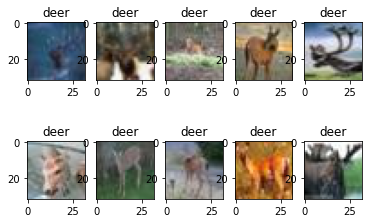

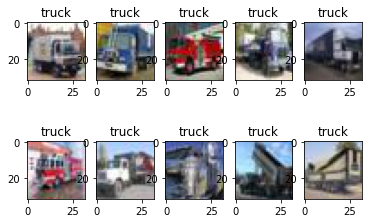

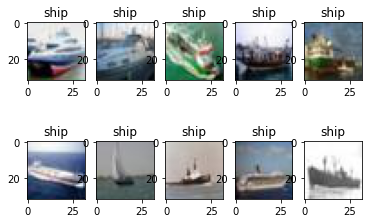

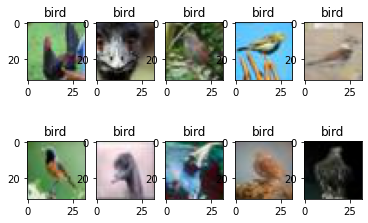

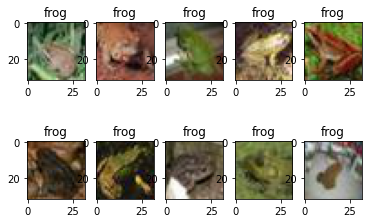

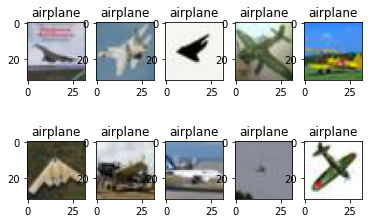

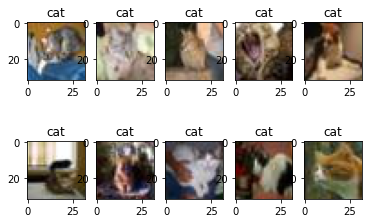

folder: train


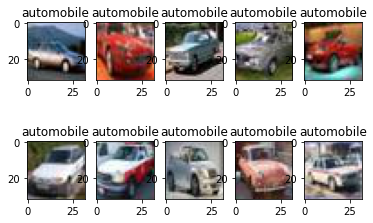

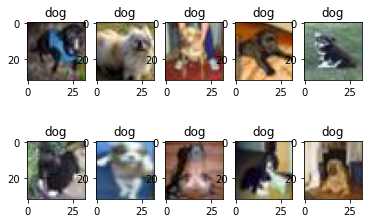

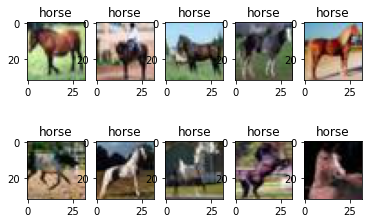

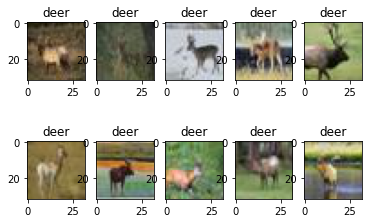

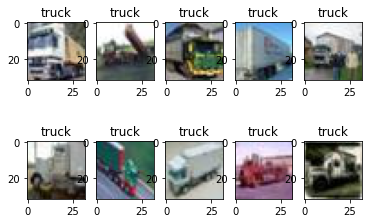

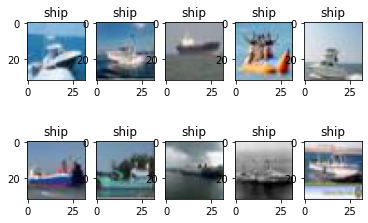

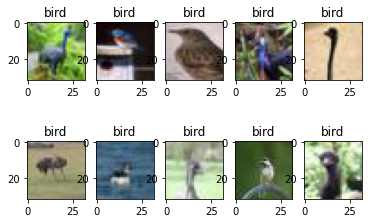

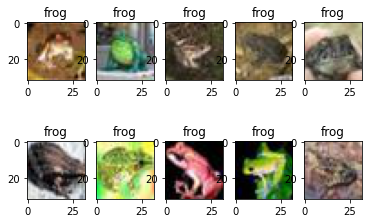

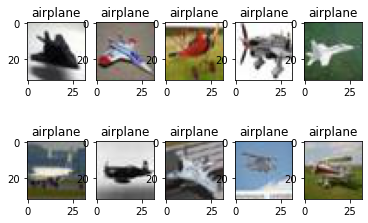

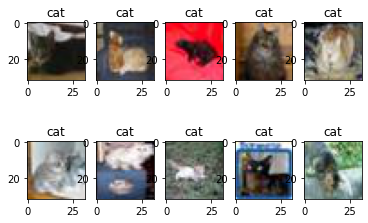

In [33]:
dir = "/content/CIFAR10/"
test = []
for folder in os.listdir(dir):
  print("folder:", folder)
  for i in os.listdir(os.path.join(dir, folder)):
    label = i
    for x in range(0, 10):
      image_file = os.path.join(dir, folder, i, "000" + str(x) + ".jpg")
      plt.subplot(2, 5, x+1)
      img = mpimg.imread(image_file)
      imgplot = plt.imshow(img)
      plt.title(i)
    plt.show()


ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿ®ÿ±ÿß€å ÿ≥ÿßÿÆÿ™ŸÜ ÿ¢ÿ±ÿß€åŸá ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ. ÿØÿ± ÿ¢ÿ±ÿß€åŸá ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß Ÿáÿ± ÿ≥ÿ∑ÿ± ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá €å⁄© ÿ™ÿµŸà€åÿ± Ÿà Ÿáÿ± ÿ≥ÿ™ŸàŸÜ ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá €å⁄© ÿØÿ≥ÿ™Ÿá ÿßÿ≤ ÿßÿ¥€åÿßÿ≥ÿ™ÿõ ÿ≥ÿ™ŸàŸÜ ÿßŸàŸÑ ŸáŸàÿßŸæ€åŸÖÿßÿå ÿ≥ÿ™ŸàŸÜ ÿØŸàŸÖ ŸÖÿßÿ¥€åŸÜÿå ÿ≥ÿ™ŸàŸÜ ÿ≥ŸàŸÖ Ÿæÿ±ŸÜÿØŸá Ÿà ÿ≥ÿ™ŸàŸÜ ⁄ÜŸáÿßÿ±ŸÖ ⁄Øÿ±ÿ®Ÿá. ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß ⁄©Ÿá ŸÅŸÇÿ∑ €¥ ÿØÿ≥ÿ™Ÿá ÿßŸàŸÑ ÿØ€åÿ™ÿßÿ≥ÿ™ ÿ±ÿß ÿ®ÿ±ÿ±ÿ≥€å ŸÖ€å‚Äå⁄©ŸÜ€åŸÖÿå €¥ ŸÜŸàÿπ ÿÆÿ±Ÿàÿ¨€å ÿ®ÿ±ÿß€å ÿ™ÿßÿ®ÿπ ÿØÿ± ŸÜÿ∏ÿ± ŸÖ€å‚Äå⁄Ø€åÿ±€åŸÖ. ÿß⁄Øÿ± ÿ™ÿµŸà€åÿ± ŸÖŸàÿ±ÿØ ŸÜÿ∏ÿ± ÿßÿ≤ ⁄Øÿ±ŸàŸá ŸáŸàÿßŸæ€åŸÖÿß ÿ®ÿßÿ¥ÿØÿå ÿØÿ± ÿ¢ÿ±ÿß€åŸá ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿ®ÿß€åÿØ ÿßŸÜÿØ€åÿ≥ ÿµŸÅÿ± ÿ¢ŸÜ €å⁄© Ÿà ÿ®ŸÇ€åŸá ÿßŸÜÿØ€åÿ≥ Ÿáÿß ÿµŸÅÿ± ÿ®ÿßÿ¥ÿØÿå ÿ®Ÿá ÿ¥⁄©ŸÑ [1,0,0,0]. ÿß⁄Øÿ± ÿ™ÿµŸà€åÿ± ŸÖÿßÿ¥€åŸÜ ÿ®ÿßÿ¥ÿØÿå ÿ≥ÿ∑ÿ± ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ ÿ™ÿµŸà€åÿ± ÿØÿ± ÿ¢ÿ±ÿß€åŸá ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß ÿ®ÿß€åÿØ ÿ®Ÿá ÿµŸàÿ±ÿ™ [0,1,0,0] ÿ®ÿßÿ¥ÿØ Ÿà ÿ®Ÿá ŸáŸÖ€åŸÜ ÿ™ÿ±ÿ™€åÿ® ÿ®ÿ±ÿß€å ÿØ€å⁄Øÿ± ÿßÿ¥€åÿßÿ°

In [34]:
def find_label(class_name):
  if class_name == "airplane":
    return [1, 0, 0, 0]
  elif class_name == "automobile":
    return [0, 1, 0, 0]
  elif class_name == "bird":
    return [0, 0, 1, 0]
  elif class_name == "cat":
    return [0, 0, 0, 1]

ŸÖ€å‚ÄåÿÆŸàÿßŸá€åŸÖ ÿ™ÿµÿßŸà€åÿ± €¥ ÿØÿ≥ÿ™Ÿá ÿßŸàŸÑ ÿßÿ≤ ŸÅŸàŸÑÿØÿ± ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™‚Äå ÿ±ÿß ÿØÿ± ÿ¢ÿ±ÿß€åŸá ÿ±€åÿÆÿ™Ÿá Ÿà ŸÑ€åÿ®ŸÑ ŸÖÿ™ŸÜÿßÿ∏ÿ± ÿ®ÿß Ÿáÿ± ÿ™ÿµŸà€åÿ± ÿ±ÿß ŸÜ€åÿ≤ ÿ∞ÿÆ€åÿ±Ÿá ⁄©ŸÜ€åŸÖ. ÿ®ÿ±ÿß€å ÿß€åŸÜ ⁄©ÿßÿ± ŸÜ€åÿßÿ≤ ÿ®Ÿá €¥ ŸÑ€åÿ≥ÿ™ ÿØÿßÿ±€åŸÖ. €å⁄© ŸÑ€åÿ≥ÿ™ ÿ®ÿ±ÿß€å ⁄©ŸÑ ÿØ€åÿ™ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ÿå €å⁄© ŸÑ€åÿ≥ÿ™ ÿ®ÿ±ÿß€å ⁄©ŸÑ ÿØ€åÿ™ÿß€å ÿ™ÿ≥ÿ™ÿå €å⁄© ŸÑ€åÿ≥ÿ™ ÿ®ÿ±ÿß€å ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß€å ÿØ€åÿ™ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà €å⁄© ŸÑ€åÿ≥ÿ™ ÿ®ÿ±ÿß€å ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß€å ÿØ€åÿ™ÿß€å ÿ™ÿ≥ÿ™. 

In [35]:
test_data = [] 
train_data = []
test_label = []
train_label = []

Ÿàÿßÿ±ÿØ Ÿáÿ± ⁄©ÿØÿßŸÖ ÿßÿ≤ ŸÅŸàŸÑÿØŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿ™ÿ≥ÿ™ ÿ¥ÿØŸáÿå Ÿàÿßÿ±ÿØ ŸÅŸàŸÑÿØÿ±Ÿáÿß€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å ŸÖŸàÿ±ÿØ ŸÜÿ∏ÿ± ŸÖ€å‚Äåÿ¥Ÿà€åŸÖ Ÿà Ÿáÿ± ÿ™ÿµŸà€åÿ± ÿ±ÿß ÿ®ÿß ÿØÿ≥ÿ™Ÿàÿ±

```
matplotlib.image.imread()
```
ÿ®Ÿá ÿ¥⁄©ŸÑ €å⁄© ÿ¢ÿ±ÿß€åŸá ŸÖ€å‚ÄåÿÆŸàÿßŸÜ€åŸÖ Ÿà ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá ⁄©ŸÑ ÿØ€åÿ™ÿßŸáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑Ÿá ÿßÿ∂ÿßŸÅŸá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. ŸÑ€åÿ®ŸÑ Ÿáÿ± ÿπ⁄©ÿ≥ ÿ±ÿß ŸÜ€åÿ≤ ÿ®ÿß ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá ÿßÿ≥ŸÖ ŸÅŸàŸÑÿØÿ±€å ⁄©Ÿá ÿØÿ± ÿ¢ŸÜ Ÿáÿ≥ÿ™€åŸÖ Ÿà ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ™ÿßÿ®ÿπ€å ⁄©Ÿá ŸÇÿ®ŸÑ‚Äåÿ™ÿ± ÿ™Ÿàÿ∂€åÿ≠ ÿØÿßÿØ€åŸÖ ÿ™ŸàŸÑ€åÿØ ⁄©ÿ±ÿØŸá Ÿà ÿ®Ÿá ŸÑ€åÿ≥ÿ™ ⁄©ŸÑ ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß ÿßÿ∂ÿßŸÅŸá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. 
ÿØÿ± ŸÜŸáÿß€åÿ™ ŸÑ€åÿ≥ÿ™‚ÄåŸáÿß ÿ±ÿß ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. 

ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß ⁄©Ÿá ÿØÿ± ŸÅŸàŸÑÿØÿ± ÿ¢ŸÖŸàÿ≤ÿ¥ÿå ÿ®ÿ±ÿß€å Ÿáÿ± ÿØÿ≥ÿ™Ÿá ÿ®ŸÜÿØ€å €µ€∞€∞€∞ ÿπ⁄©ÿ≥ ŸÖŸàÿ¨ŸàÿØ ÿßÿ≥ÿ™ Ÿà ŸÖÿß €¥ ÿØÿ≥ÿ™Ÿá ÿ±ÿß Ÿæÿ±ÿØÿßÿ≤ÿ¥ ⁄©ÿ±ÿØŸá‚Äåÿß€åŸÖÿå ŸÑ€åÿ≥ÿ™ ÿØ€åÿ™ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ (20000,32,32,32,3) ÿßÿ≥ÿ™ ⁄©Ÿá €≥€≤ ÿßŸÜÿØÿßÿ≤Ÿá ÿ∑ŸàŸÑ Ÿà ÿπÿ±ÿ∂ Ÿáÿ± ÿπ⁄©ÿ≥ Ÿà €≥ ÿ®Ÿá ÿÆÿßÿ∑ÿ± ÿ≥Ÿá ⁄©ÿßŸÜÿßŸÑ ÿ±ŸÜ⁄Ø€å ŸÇÿ±ŸÖÿ≤ Ÿà ÿ≥ÿ®ÿ≤ Ÿà ÿ¢ÿ®€å Ÿáÿ± ÿπ⁄©ÿ≥ ÿßÿ≥ÿ™. ÿ≥ÿß€åÿ≤ ÿ¢ÿ±ÿß€åŸá  ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿØ€åÿ™ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ (20000,4) ÿßÿ≥ÿ™ ⁄ÜŸàŸÜ ÿØÿ± ŸÖÿ¨ŸÖŸàÿπ €≤€∞€∞€∞€∞ ÿ™ÿµŸà€åÿ± ÿßÿ≤ €¥ ÿØÿ≥ÿ™Ÿá ÿ®ŸÜÿØ€å ÿ∞ÿÆ€åÿ±Ÿá ⁄©ÿ±ÿØŸá‚Äåÿß€åŸÖ.

ÿØÿ± ŸÅŸàŸÑÿØÿ± ÿ™ÿ≥ÿ™ ÿ®ÿ±ÿß€å Ÿáÿ± ÿØÿ≥ÿ™Ÿá ÿ®ŸÜÿØ€å €±€∞€∞€∞ ÿπ⁄©ÿ≥ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ Ÿæÿ≥ ÿßŸÜÿØÿßÿ≤Ÿá ÿ¢ÿ±ÿß€åŸá ÿØ€åÿ™ÿß€å ÿ™ÿ≥ÿ™ ÿ®ÿ±ÿßÿ®ÿ± (4000,32,32,3) ÿßÿ≥ÿ™ Ÿà ÿ≥ÿß€åÿ≤ ÿ¢ÿ±ÿß€åŸá ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß€å ŸÖÿ™ŸÜÿßÿ∏ÿ± ÿ®ÿß ÿ™ÿµÿßŸà€åÿ± ÿ™ÿ≥ÿ™ ŸÜ€åÿ≤ (4000,4) ŸÖ€å‚Äåÿ®ÿßÿ¥ÿØ

In [36]:
dir = "/content/CIFAR10/"
classes = ["airplane", "automobile", "bird", "cat"]

for folder in os.listdir(dir):
  for class_name in classes:
    images_files = os.listdir(os.path.join(dir, folder, class_name))
    for image in images_files:
      img = mpimg.imread(os.path.join(os.path.join(dir, folder, class_name, image)))
      image_array = np.asarray(img)
      if folder == "train":
        train_data.append(image_array)
        train_label.append(find_label(class_name))
      if folder == "test":
        test_data.append(image_array)
        test_label.append(find_label(class_name))
train_data = np.array(train_data)    
train_label = np.array(train_label) 
test_data = np.array(test_data)      
test_label = np.array(test_label)
print("train:")   
print(train_data.shape)   
print(train_label.shape) 
print("test")
print(test_data.shape)   
print(test_label.shape)   


train:
(20000, 32, 32, 3)
(20000, 4)
test
(4000, 32, 32, 3)
(4000, 4)


ÿ®ÿ±ÿß€å ⁄©ÿßŸáÿ¥ Ÿæ€å⁄Ü€åÿØ⁄Ø€å ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ÿå ÿ™ÿµÿßŸà€åÿ± ÿ±ÿß ÿÆÿß⁄©ÿ≥ÿ™ÿ±€å ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. ŸÇÿ®ŸÑÿß ⁄©Ÿá ÿ™ÿµÿßŸà€åÿ± ÿ±ŸÜ⁄Ø€å ÿ®ŸàÿØÿå ÿ≥Ÿá ⁄©ÿßŸÜÿßŸÑ ÿ±ŸÜ⁄Ø€å ÿØÿßÿ¥ÿ™€åŸÖ. ÿ®ÿπÿØ ÿßÿ≤ ÿÆÿß⁄©ÿ≥ÿ™ÿ±€å ⁄©ÿ±ÿØŸÜÿå ⁄ÜŸáÿßÿ±ŸÖ€åŸÜ ÿßŸÜÿØ€åÿ≥ ÿ¢ÿ±ÿß€åŸá ÿØÿßÿØŸá‚ÄåŸáÿß ⁄©Ÿá ŸÜÿ¥ÿßŸÜ ÿØŸáŸÜÿØŸá ÿ™ÿπÿØÿßÿØ ⁄©ÿßŸÜÿßŸÑ‚ÄåŸáÿß€å ÿ±ŸÜ⁄Ø€å ÿ®ŸàÿØ Ÿà ŸÖŸÇÿØÿßÿ± ÿ≥Ÿá ÿØÿßÿ¥ÿ™ÿå ÿßÿ≤ ÿ®€åŸÜ ŸÖ€å‚Äåÿ±ŸàÿØ ⁄ÜŸàŸÜ ÿ™ŸÜŸáÿß €å⁄© ÿ±ŸÜ⁄Ø ÿØÿßÿ±€åŸÖ. 

In [37]:
def rgb2gray(rgb):
 r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
 gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
 return gray

train_gray = rgb2gray(train_data)
test_gray = rgb2gray(test_data)
print(train_gray.shape)
print(test_gray.shape)

(20000, 32, 32)
(4000, 32, 32)


ÿ®ÿ±ÿß€å ÿßŸÅÿ≤ÿß€åÿ¥ ÿ≥ÿ±ÿπÿ™ ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ Ÿà ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿ≤€åÿßÿØŸá ÿ¥ÿØŸÜ ÿßŸÜÿØÿßÿ≤Ÿá ⁄Øÿ±ÿßÿØ€åÿßŸÜÿå ŸÖŸÇÿßÿØ€åÿ± ÿ±ÿß ÿ®ÿß ÿ™ŸÇÿ≥€åŸÖ ⁄©ÿ±ÿØŸÜ ÿ®ÿ± €≤€µ€µ ŸÜÿ±ŸÖÿßŸÑ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ.

In [38]:
train_gray_normalized = np.divide(train_gray, 255)
test_gray_normalized = np.divide(test_gray, 255)

⁄ÜŸàŸÜ ÿØÿ± ŸÑÿß€åŸá Ÿàÿ±ŸàÿØ€å €±€∞€≤€¥ ŸÜŸàÿ±ŸàŸÜ ÿØÿßÿ±€åŸÖÿå ÿßÿ®ÿπÿßÿØ ŸÖÿßÿ™ÿ±€åÿ≥ ÿØ€åÿ™ÿß ÿ±ÿß ÿ®Ÿá ⁄ØŸàŸÜŸá‚Äåÿß€å ÿ™ÿ∫€å€åÿ± ŸÖ€å‚ÄåÿØŸá€åŸÖ ÿ™ÿß ÿßÿ®ÿπÿßÿØ ŸÖÿßÿ™ÿ±€åÿ≥ ÿ®Ÿá ÿ¥⁄©ŸÑ (1024,ÿ™ÿπÿØÿßÿØ ÿ≥ŸÖŸæŸÑ‚ÄåŸáÿß) ÿ®ÿßÿ¥ÿØ. 

In [39]:
train_data_reshaped = train_gray_normalized.reshape(-1, 1024)
test_data_reshaped = test_gray_normalized.reshape(-1, 1024)

print(train_data_reshaped.shape)
print(test_data_reshaped.shape)

(20000, 1024)
(4000, 1024)


ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß€å€å ⁄©Ÿá ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ®ÿß ŸÜÿ∏ÿßÿ±ÿ™ ÿßÿ≥ÿ™ Ÿà ŸÑ€åÿ®ŸÑ Ÿáÿ± ÿ™ÿµŸà€åÿ± ÿ±ÿß ŸÖ€å‚ÄåÿØÿßŸÜ€åŸÖÿå ÿ™ÿµÿßŸà€åÿ± ÿ±ÿß ÿ®Ÿá ⁄ØŸàŸÜŸá‚Äåÿß€å ÿ∞ÿÆ€åÿ±Ÿá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿ™ÿß ŸáŸÖÿ±ÿßŸá ÿ®ÿß ŸÑ€åÿ®ŸÑÿ¥ÿßŸÜ ÿ®ÿßÿ¥ŸÜÿØ. ÿ™ÿßÿ®ÿπ ÿ≤€åÿ± Ÿáÿ± ÿ™ÿµŸà€åÿ± ÿ±ÿß ÿ®Ÿá ŸáŸÖÿ±ÿßŸá ŸÑ€åÿ®ŸÑ ŸÖÿ™ŸÜÿßÿ∏ÿ±ÿ¥ ÿØÿ± €å⁄© ŸÑ€åÿ≥ÿ™ Ÿàÿßÿ±ÿØ ŸÖ€å‚Äå⁄©ŸÜÿØ. €å⁄© ŸÑ€åÿ≥ÿ™ ÿ®ÿ±ÿß€å ÿØ€åÿ™ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà €å⁄© ŸÑ€åÿ≥ÿ™ ÿ®ÿ±ÿß€å ÿØ€åÿ™ÿß€å ÿ™ÿ≥ÿ™ ÿØÿ± ŸÜÿ∏ÿ± ŸÖ€å‚Äå⁄Ø€åÿ±€åŸÖ ÿ®Ÿá ⁄ØŸàŸÜŸá‚Äåÿß€å ⁄©Ÿá ÿØÿ± Ÿáÿ± ⁄©ÿØÿßŸÖÿå ÿ™ÿµÿßŸà€åÿ± ÿ®Ÿá ŸáŸÖÿ±ÿßŸá ŸÑ€åÿ®ŸÑ ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØŸá ÿßŸÜÿØ. Ÿáÿ± ÿπÿ∂Ÿà ÿßÿ≤ ÿß€åŸÜ ŸÑ€åÿ≥ÿ™ÿå ÿØÿ± ÿØÿ±ÿß€åŸá ÿµŸÅÿ±ŸÖ ÿØ€åÿ™ÿß€å ÿÆŸàÿØ ÿπ⁄©ÿ≥ Ÿà ÿØÿ± ÿØÿ±ÿß€åŸá €å⁄©ŸÖ ŸÑ€åÿ®ŸÑ ÿπ⁄©ÿ≥ ÿ±ÿß ÿØÿßÿ±ÿØ

In [40]:
def join_data_label(data, label):
  data_label_set = []
  for i in range(len(data)):
    data_label_set.append((data[i].reshape(1024,1), label[i].reshape(4,1)))
  data_label_set = np.array(data_label_set, dtype=object)
  return data_label_set


train_set = join_data_label(train_data_reshaped, train_label)  # all train data with correspanding labels 
test_set = join_data_label(test_data_reshaped, test_label)  # all train data with correspanding labels 

ÿØ€åÿ™ÿß ÿ±ÿß ÿ®ÿ±ŸáŸÖ ŸÖ€å‚Äåÿ±€åÿ≤€åŸÖ

In [41]:
np.random.shuffle(train_set)
np.random.shuffle(test_set)

# Feedforward

ÿ™ÿßÿ®ÿπ ÿ≥€å⁄ØŸÖŸà€åÿØ ÿ∑ÿ®ŸÇ ŸÅÿ±ŸÖŸàŸÑ ÿ™ÿπÿ±€åŸÅ ÿ¥ÿØŸá ÿßÿ≥ÿ™. 

In [42]:
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÅÿ±ŸÖŸàŸÑ ⁄©ŸÑ€å ŸÅ€åÿØŸÅŸàÿ±Ÿàÿßÿ±ÿØÿå ÿØÿ± Ÿáÿ± ŸÑÿß€åŸáÿå ÿ®ÿß€åÿØ ŸÖÿßÿ™ÿ±€åÿ≥ Ÿàÿ≤ŸÜ‚Äå ÿ±ÿß ÿØÿ± ŸÖÿßÿ™ÿ±€åÿ≥ ŸÖŸÇÿØÿßÿ± ŸáŸÜŸàÿ±ŸàŸÜ‚ÄåŸáÿß€å ŸÑÿß€åŸá ŸÇÿ®ŸÑ ÿ∂ÿ±ÿ®ÿå Ÿà ÿ®ÿß ÿ®ÿß€åÿßÿ≥ ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ ŸÑÿß€åŸá ÿ¨ŸÖÿπ ⁄©ÿ±ÿØŸá Ÿà ÿ®ÿπÿØ ÿ®Ÿá ÿ™ÿßÿ®ÿπ ŸÅÿπÿßŸÑ€åÿ™ ÿ®ÿØŸá€åŸÖ ⁄©Ÿá ÿ∑ÿ®ŸÇ ÿØÿ≥ÿ™Ÿàÿ±⁄©ÿßÿ±ÿå ÿ™ÿßÿ®ÿπ ŸÅÿπÿßŸÑ€åÿ™ ÿØÿ± ÿß€åŸÜÿ¨ÿß ÿ≥€å⁄ØŸÖŸà€åÿØ ÿßÿ≥ÿ™

In [43]:
def output(w, a, bias):
  z = (w @ a) + bias
  return sigmoid(z)

ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿπŸÖŸÑ€åÿßÿ™ ŸÅ€åÿØŸÅŸàÿ±Ÿàÿßÿ±ÿØ ÿ±ÿß ÿßŸÜÿ¨ÿßŸÖ ÿØÿßÿØŸá Ÿà ÿ®ÿß ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá ÿ™ÿπÿØÿßÿØ ÿ≠ÿØÿ≥‚ÄåŸáÿß€å ÿØÿ±ÿ≥ÿ™ÿå ÿØŸÇÿ™ ŸÖÿØŸÑ ÿ±ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖ€å‚Äå⁄©ŸÜÿØ.

ÿ™ÿßÿ®ÿπ ÿØÿ± Ÿàÿ±ŸàÿØ€å ŸÖÿßÿ™ÿ±€åÿ≥ ÿØ€åÿ™ÿß ÿ±ÿß ŸÖ€å‚Äå⁄Ø€åÿ±ÿØ ⁄©Ÿá ÿ™ÿπÿØÿßÿØ ÿ≥ÿ∑ÿ±Ÿáÿß€åÿ¥ ÿ®ÿ±ÿßÿ®ÿ± ÿ™ÿπÿØÿßÿØ ÿ™ÿµÿßŸà€åÿ±€å ÿßÿ≥ÿ™ ⁄©Ÿá ŸÖ€å‚ÄåÿÆŸàÿßŸá€åŸÖ ÿ®Ÿá ÿπŸÜŸàÿßŸÜ Ÿàÿ±ŸàÿØ€å ÿ®Ÿá ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ÿ®ÿØŸá€åŸÖ Ÿà ÿ™ÿπÿØÿßÿØ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€åÿ¥ €±€∞€≤€¥ ÿßÿ≥ÿ™. ŸáŸÖ⁄ÜŸÜ€åŸÜ ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å Ÿàÿ≤ŸÜ‚ÄåŸáÿß Ÿà ÿ®ÿ±ÿØÿßÿ±Ÿáÿß€å ÿ®ÿß€åÿßÿ≥‚ÄåŸáÿß€å ŸÑÿß€åŸá‚ÄåŸáÿß€å ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ÿ±ÿß ŸÜ€åÿ≤ ÿ®Ÿá ÿπŸÜŸàÿßŸÜ Ÿàÿ±ŸàÿØ€å ŸÖ€å‚Äå⁄Ø€åÿ±ÿØ.

ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ŸÖŸàÿ±ÿØ ŸÜÿ∏ÿ±ÿå ÿØÿ± ŸÑÿß€åŸá Ÿàÿ±ŸàÿØ€å €±€∞€≤€¥ ŸÜŸàÿ±ŸàŸÜ ÿØÿßÿ±ÿØ. ÿØŸà ŸÑÿß€åŸá ŸÜŸáÿßŸÜ ⁄©Ÿá Ÿáÿ± ⁄©ÿØÿßŸÖ €±€∂ ŸÜŸàÿ±ŸàŸÜ Ÿà ŸÑÿß€åŸá ÿÆÿ±Ÿàÿ¨€å ŸÜ€åÿ≤ €¥ ŸÜŸàÿ±ŸàŸÜ ÿØÿßÿ±ÿØ ⁄ÜŸàŸÜ ÿßÿ≤ ÿßÿ®ÿ™ÿØÿß ŸÜ€åÿ≤ ŸÖ€åÿÆŸàÿßÿ≥ÿ™€åŸÖ ÿØÿ≥ÿ™Ÿá ÿ®ŸÜÿØ€å ÿ±ÿß ÿ±Ÿà€å €¥ ÿØÿ≥ÿ™Ÿá ÿßŸÜÿ¨ÿßŸÖ ÿØŸá€åŸÖ. 

ÿØÿ± ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿ®Ÿá ÿßÿ≤ÿß€å Ÿáÿ± ÿπ⁄©ÿ≥ÿå ⁄©Ÿá Ÿàÿ±ŸàÿØ€å ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ÿßÿ≥ÿ™ÿå ŸÖÿ±ÿßÿ≠ŸÑ€å ÿ±ÿß ÿ∑€å ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. ÿßÿ®ÿ™ÿØÿß ÿßÿ®ÿπÿßÿØ Ÿàÿ±ŸàÿØ€å ÿ±ÿß ÿ™ŸÜÿ∏€åŸÖ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿ∑Ÿàÿ±€å ⁄©Ÿá (1024,1) ÿ®ÿßÿ¥ÿØ. ÿ≥Ÿæÿ≥ ÿ®ÿ±ÿß€å ŸÑÿß€åŸá ÿßŸàŸÑÿå ŸÖÿßÿ™ÿ±€åÿ≥ Ÿàÿ≤ŸÜ‚ÄåŸáÿß€å ÿ¢ŸÜ ŸÑÿß€åŸá ÿ±ÿß ÿ®ÿß ŸÖÿßÿ™ÿ±€åÿ≥ Ÿàÿ±ŸàÿØ€å ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ÿ®Ÿá ŸáŸÖÿ±ÿßŸá ÿ®ÿß€åÿßÿ≥ ŸÑÿß€åŸá ÿßŸàŸÑ ÿ®Ÿá ÿ™ÿßÿ®ÿπ€å ⁄©Ÿá ŸÇÿ®ŸÑ‚Äåÿ™ÿ± ÿ™ÿπÿ±€åŸÅ ÿ¥ÿØ ŸÖ€å‚ÄåÿØŸá€åŸÖ. ÿÆÿ±Ÿàÿ¨€å ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿ±ÿß ÿ®Ÿá ŸáŸÖÿ±ÿßŸá Ÿàÿ≤ŸÜ‚ÄåŸáÿß€å ŸÑÿß€åŸá ÿØŸàŸÖ Ÿà ÿ®ÿß€åÿßÿ≥ ŸÑÿß€åŸá ÿØŸàŸÖÿå ÿ®Ÿá ÿ™ÿßÿ®ÿπ ŸÖ€å‚ÄåÿØŸá€åŸÖ ÿ™ÿß ÿÆÿ±Ÿàÿ¨€å ŸÑÿß€åŸá ÿ®ÿπÿØ€å ŸÖÿ¥ÿÆÿµ ÿ¥ŸàÿØ. ÿ®ÿßÿ± ÿØ€å⁄Øÿ± ÿß€åŸÜ ⁄©ÿßÿ± ÿ±ÿß ÿ™⁄©ÿ±ÿßÿ± ⁄©ÿ±ÿØŸá ÿ™ÿß ÿÆÿ±Ÿàÿ¨€å ŸÑÿß€åŸá ÿ¢ÿÆÿ± ŸÖÿ¥ÿÆÿµ ÿ¥ŸàÿØ. ÿ≠ÿßŸÑ ÿØÿ± ŸÑÿß€åŸá ÿÆÿ±Ÿàÿ¨€å €å⁄© ÿ®ÿ±ÿØÿßÿ± (4,1) ÿØÿßÿ±€åŸÖ ⁄©Ÿá ÿßŸÜÿØ€åÿ≥€å ⁄©Ÿá ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÖŸÇÿØÿßÿ± ÿ±ÿß ÿØÿßÿ±ÿØÿå ÿ≠ÿØÿ≥ ŸÖÿØŸÑ ÿßÿ≥ÿ™. ÿ®ÿß Ÿæ€åÿØÿß ⁄©ÿ±ÿØŸÜ ÿß€åŸÜ ÿßŸÜÿØ€åÿ≥ Ÿà ŸÖŸÇÿß€åÿ≥Ÿá ÿ¢ŸÜ ÿ®ÿß ŸÑ€åÿ®ŸÑ ÿ™ÿµŸà€åÿ± ⁄©Ÿá ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ÿ™ÿµŸà€åÿ± ŸàÿßŸÇÿπÿß ⁄ÜŸá ÿ®ŸàÿØÿå ÿØŸÇÿ™ ŸÖÿØŸÑ ÿ±ÿß ŸÖ€å‚Äåÿ≥ŸÜÿ¨€åŸÖ. ÿ™ÿπÿØÿßÿØ ÿ≠ÿØÿ≥‚ÄåŸáÿß€å ÿØÿ±ÿ≥ÿ™ ÿ™ŸÇÿ≥€åŸÖ ÿ®ÿ± ⁄©ŸÑ ÿ≠ÿØÿ≥‚ÄåŸáÿß ÿØŸÇÿ™ ŸÖÿØŸÑ ÿßÿ≥ÿ™

In [44]:
def feedforward(dataset, w1, w2, w3, b1, b2, b3):
  correct_guesses = 0
  for idx , row in enumerate(dataset):
    data = row[0]  # each row contains image data and it's label. 0 index is the matrix (1024, 1) of image and 1 index is (4,1) label
    a1 = output(w1, data, b1)
    a2 = output(w2, a1, b2)
    a3 = output(w3, a2, b3)

    label_predicted = np.argmax(a3, axis=0)
    
    real_label = np.argmax(row[1], axis=0)

    if label_predicted[0] == real_label[0]:
      correct_guesses += 1
  
  accuracy = (correct_guesses / len(dataset)) * 100
  return accuracy

ÿ®€åŸÜ Ÿáÿ± ÿØŸà ŸÑÿß€åŸáÿå €å⁄© ŸÖÿßÿ™ÿ±€åÿ≥ Ÿàÿ≤ŸÜ ÿØÿ± ŸÜÿ∏ÿ± ŸÖ€å‚Äå⁄Ø€åÿ±€åŸÖ ⁄©Ÿá ÿ™ÿπÿØÿßÿØ ÿ≥ÿ∑ÿ±Ÿáÿß€å ÿ¢ŸÜ ÿ®ÿ±ÿßÿ®ÿ± ÿ™ÿπÿØÿßÿØ ŸÜŸàÿ±ŸàŸÜ‚ÄåŸáÿß€å ŸÑÿß€åŸá ÿ®ÿπÿØ€å Ÿà ÿ™ÿπÿØÿßÿØ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€åÿ¥ ÿ®ÿ±ÿßÿ®ÿ± ÿ™ÿπÿØÿßÿØ ŸÜŸàÿ±ŸàŸÜ‚ÄåŸáÿß€å ŸÑÿß€åŸá ŸÅÿπŸÑ€å ÿßÿ≥ÿ™. ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß ⁄©Ÿá €¥ ŸÑÿß€åŸá ÿØÿßÿ±€åŸÖ ⁄©Ÿá ÿØÿ± ŸÑÿß€åŸá ÿßŸàŸÑ €±€∞€≤€¥ ŸÜŸàÿ±ŸàŸÜÿå ÿØŸà ŸÑÿß€åŸá ŸÖ€åÿßŸÜ€å Ÿáÿ± ⁄©ÿØÿßŸÖ €±€∂ ŸÜŸàÿ±ŸàŸÜ Ÿà ŸÑÿß€åŸá ÿ¢ÿÆÿ± €¥ ŸÜŸàÿ±ŸàŸÜ ÿØÿßÿ±ÿØÿå ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å Ÿàÿ≤ŸÜ ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ≤€åÿ± ÿØÿ± ŸÖ€å‚Äåÿ¢€åÿØ. ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å Ÿàÿ≤ŸÜ‚ÄåŸáÿß ÿ±ÿß ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ÿ±ŸÜÿØŸàŸÖ Ÿæÿ± ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ.

ÿ®€åŸÜ Ÿáÿ± ÿØŸà ŸÑÿß€åŸá ŸÜ€åÿ≤ €å⁄© ÿ®ÿ±ÿØÿßÿ± ÿ®ÿß€åÿßÿ≥ ÿØÿ± ŸÜÿ∏ÿ± ŸÖ€å‚Äå⁄Ø€åÿ±€åŸÖ ⁄©Ÿá ÿ™ÿπÿØÿßÿØ ÿ≥ÿ∑ÿ±Ÿáÿß€åÿ¥ ÿ®Ÿá ÿßŸÜÿØÿßÿ≤Ÿá ÿ™ÿπÿØÿßÿØ ŸÜŸàÿ±ŸàŸÜ‚ÄåŸáÿß€å ŸÑÿß€åŸá ÿ®ÿπÿØ€å Ÿà ÿ™ÿπÿØÿßÿØ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€åÿ¥ €å⁄© ÿßÿ≥ÿ™ Ÿà ÿ®ÿß ÿµŸÅÿ± Ÿæÿ± ÿ¥ÿØŸá ÿßÿ≥ÿ™

ÿ™ÿßÿ®ÿπ ŸÅ€åÿØŸÅŸàÿ±Ÿàÿßÿ±ÿØ ÿ±ÿß ÿ®ÿ± ÿ±Ÿà€å ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å ÿß€åÿ¨ÿßÿØ ÿ¥ÿØŸáÿå ÿ±ÿßŸÜ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß ⁄©Ÿá ŸáŸÜŸàÿ≤ ŸÅÿ±ÿ¢€åŸÜÿØ €åÿßÿØ⁄Ø€åÿ±€å ÿ∑€å ŸÜÿ¥ÿØŸá Ÿà ŸÖŸÇÿØÿßÿ±ÿØŸá€å ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å Ÿàÿ≤ŸÜ‚ÄåŸáÿß ÿ™ÿµÿßÿØŸÅ€å ÿ®ŸàÿØŸáÿå ÿØŸÇÿ™ ÿ≤€åÿßÿØ€å ÿßÿ≤ ŸÖÿØŸÑ ŸÖŸàÿ±ÿØ ÿßŸÜÿ™ÿ∏ÿßÿ± ŸÜ€åÿ≥ÿ™ Ÿà ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ®Ÿá €≤€µ ÿØÿ±ÿµÿØ ŸÜÿ≤ÿØ€å⁄© ÿßÿ≥ÿ™. ÿ®ÿ±ÿß€å ŸÖÿ´ÿßŸÑ ÿØÿ± ⁄ÜŸÜÿØ ÿ®ÿßÿ± ÿßÿ¨ÿ±ÿß ÿØŸÇÿ™ ÿ®Ÿá ÿß€åŸÜ ÿ¥⁄©ŸÑ ÿ®ŸàÿØŸá: 27, 21.5, 22.5, 25

In [45]:
w1 = np.random.normal(size=(16, 1024))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(4,16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

accuracy = feedforward(train_set[:200], w1, w2, w3, b1, b2, b3)
print("accuracy =", accuracy)

accuracy = 27.0


# Backpropagation 

ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿπŸÖŸÑ€åÿßÿ™ ÿ®⁄©‚ÄåŸæÿ±ŸàŸæ⁄Ø€åÿ¥ŸÜ ÿ±ÿß ÿßŸÜÿ¨ÿßŸÖ ŸÖ€å‚ÄåÿØŸáÿØ. ÿ®Ÿá ÿß€åŸÜ ÿµŸàÿ±ÿ™ ⁄©Ÿá ÿßÿ≤ ŸÑÿß€åŸá ÿÆÿ±Ÿàÿ¨€å ÿ®Ÿá ŸÑÿß€åŸá ÿßŸàŸÑ ŸÖ€å‚Äåÿ¢€åÿØ Ÿà ÿ®Ÿá ÿ™ÿ±ÿ™€åÿ® Ÿàÿ≤ŸÜ‚ÄåŸáÿß Ÿà ÿ®ÿß€åÿßÿ≥‚ÄåŸáÿß ÿ±ÿß ÿ¢ŸæÿØ€åÿ™ ŸÖ€å‚Äå⁄©ŸÜÿØ

⁄©ŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß€å€å ⁄©Ÿá ŸÖ€å‚ÄåÿÆŸàÿßŸá€åŸÖ ŸÖÿØŸÑ ÿ±Ÿà€å ÿ¢ŸÜŸáÿß ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ®ÿ®€åŸÜÿØ ÿ®Ÿá ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß€å€å ÿ™ŸÇÿ≥€åŸÖ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ Ÿà Ÿáÿ± ÿ®ÿßÿ± ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å Ÿáÿ± ÿØÿ≥ÿ™Ÿá €åÿßÿØ⁄Ø€åÿ±€å ÿßŸÜÿ¨ÿßŸÖ ŸÖ€å‚Äåÿ¥ŸàÿØ.

ÿ®ÿß ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá ÿ™ÿßÿ®ÿπ Ÿáÿ≤€åŸÜŸá‚Äå€å ÿØÿßÿØŸá ÿ¥ÿØŸáÿå ÿ®ÿ±ÿß€å Ÿáÿ± Ÿàÿ≤ŸÜ‚ÄåŸáÿß Ÿà ÿ®ÿß€åÿßÿ≥‚ÄåŸáÿß€å Ÿáÿ± ŸÑÿß€åŸá ŸÖÿ¥ÿ™ŸÇÿßÿ™ ŸÖÿ±ÿ®Ÿàÿ∑Ÿá ÿ±ÿß ÿ®Ÿá ÿØÿ≥ÿ™ ÿ¢Ÿàÿ±ÿØŸá Ÿà ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß ÿ±ÿß ÿ¢ŸæÿØ€åÿ™ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. 

ÿØÿ± ŸÜŸáÿß€åÿ™ ÿ®Ÿá ÿßÿ≤ÿß€å Ÿáÿ± ÿß€åŸæÿß⁄© ÿ¢ŸÖŸàÿ≤ÿ¥ÿå Ÿáÿ≤€åŸÜŸá ÿ±ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿ™ÿß ÿ®ÿπÿØÿß ŸÜŸÖŸàÿØÿßÿ± Ÿáÿ≤€åŸÜŸá ÿ±ÿß ÿ±ÿ≥ŸÖ ⁄©ŸÜ€åŸÖ. ÿ™ÿßÿ®ÿπ Ÿáÿ≤€åŸÜŸá ŸÜ€åÿ≤ ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ≤€åÿ± ÿ™ÿπÿ±€åŸÅ ÿ¥ÿØŸá ÿßÿ≥ÿ™

ùê∂ùëúùë†ùë° = ‚àë (ùëéùëó
(ùêø) ‚àí ùë¶ùëó)
2

⁄©ÿØ ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ ÿ≤€åÿ± Ÿæ€åÿßÿØŸá ÿ≥ÿßÿ≤€å ÿ¥ÿØŸá ÿßÿ≥ÿ™

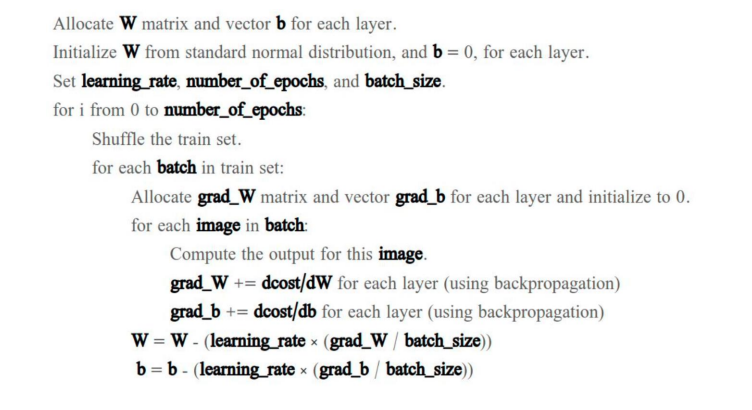

In [46]:
def backpropagation(train_set, w1, w2, w3, b1, b2, b3):
  start_time = time.time()
  
  for i in range(number_of_epochs):
    batches = [train_set[x: x+batch_size] for x in range(0, 200, batch_size)]
    for batch in batches:
      grad_w1 = np.zeros((16, 1024))
      grad_w2 = np.zeros((16, 16))
      grad_w3 = np.zeros((4, 16))

      grad_b1 = np.zeros((16,1))
      grad_b2 = np.zeros((16,1))
      grad_b3 = np.zeros((4,1))

      for image, label in batch:
        # fist we do forward propagation
        a1 = output(w1, image, b1)  # a1(16,1)
        a2 = output(w2, a1, b2)  # a2(16, 1)
        a3 = output(w3, a2, b3)  # a3(4, 1)

        # loop over indices of weight and bias matrices of output layer
        for j in range(grad_w3.shape[0]):  # 4
          for k in range(grad_w3.shape[1]):  # 16
            grad_w3[j, k] += 2 * (a3[j, 0] - label[j,0]) * (a3[j,0]) * (1 - a3[j, 0]) * a2[k,0]
        
        for j in range(grad_b3.shape[0]): # 4
          grad_b3[j, 0] += 2 * (a3[j, 0] - label[j,0]) * (a3[j,0]) * (1 - a3[j, 0])

        # hidden layer 2
        grad_a2 = np.zeros((16, 1))
        for k in range(grad_a2.shape[0]):  # 16
          for j in range(a3.shape[0]):  # 4
            grad_a2[k,0] += 2 * (a3[j, 0] - label[j, 0]) * (a3[j,0]) * (1 - a3[j, 0]) * w2[j, k]

        for k in range(grad_w2.shape[0]):
                for m in range(grad_w2.shape[1]):
                    grad_w2[k, m] += grad_a2[k, 0] * (a2[k, 0]) * (1 - a2[k, 0]) * a1[m, 0]

        for k in range(grad_b2.shape[0]):
            grad_b2[k, 0] += grad_a2[k, 0] * (a2[k, 0]) * (1 - a2[k, 0])


        # hidden layer 1
        grad_a1 = np.zeros((16,1))
        for m in range(grad_a1.shape[0]):  # 16
          for k in range(a2.shape[0]):  # 16
            grad_a1[m, 0] += grad_a2[k, 0] * (a2[k, 0]) * (1 - a2[k, 0]) * w1[k, m]
        

        for m in range(grad_w1.shape[0]):
            for v in range(grad_w1.shape[1]):
                grad_w1[m, v] += grad_a1[m, 0] * (a1[m, 0]) * (1 - a1[m, 0]) * image[v, 0]  

        for m in range(grad_b1.shape[0]):
                grad_b1[m, 0] += grad_a1[m, 0] * (a1[m, 0]) * (1 - a1[m, 0])



      w1 -= learning_rate * (grad_w1 / batch_size)
      w2 -= learning_rate * (grad_w2 / batch_size)
      w3 -= learning_rate * (grad_w3 / batch_size)

      b1 -= learning_rate * (grad_b1 / batch_size)
      b2 -= learning_rate * (grad_b2 / batch_size)
      b3 -= learning_rate * (grad_b3 / batch_size)


    # calculate cost 
    cost = 0
    for data in train_set[:200]:
      a1 = output(w1, data[0], b1)
      a2 = output(w2, a1, b2)
      a3 = output(w3, a2, b3)

      for j in range(4):
        cost += np.power((a3[j, 0] - data[1][j, 0]), 2)
    
    cost /= 200
    total_cost.append(cost)
  
  execution_duration = time.time() - start_time
  print("execution time = %s seconds" %"{:.2f}".format(execution_duration))
  

.Ÿáÿß€åŸæÿ±Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß ÿ±ÿß ÿ∑ÿ®ŸÇ ÿÆŸàÿßÿ≥ÿ™Ÿá ÿØÿ≥ÿ™Ÿàÿ±⁄©ÿßÿ± ŸÖŸÇÿØÿßÿ± ŸÖ€å‚ÄåÿØŸá€åŸÖ

ŸÖÿßÿ™ÿ±€åÿ≥ Ÿàÿ≤ŸÜ‚ÄåŸáÿß ÿ±ÿß ÿ±ŸÜÿØŸàŸÖ Ÿæÿ± ⁄©ÿ±ÿØŸá Ÿà ÿ®ÿ±ÿØÿßÿ±Ÿáÿß€å ÿ®ÿß€åÿßÿ≥‚ÄåŸáÿß ÿ±ÿß ÿ®ÿß ÿµŸÅÿ± ŸÖŸÇÿØÿßÿ±ÿØŸá€å ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. €å⁄© ÿ¢ÿ±ÿß€åŸá ÿ®ÿ±ÿß€å ÿ∞ÿÆ€åÿ±Ÿá ⁄©ÿ±ÿØŸÜ Ÿáÿ≤€åŸÜŸá Ÿáÿ± ÿ®ÿßÿ± ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ÿß€åÿ¨ÿßÿØ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿ™ÿß ÿØÿ± ÿ¢ÿÆÿ± ÿ®ÿ™ŸàÿßŸÜ€åŸÖ ŸÜŸÖŸàÿØÿßÿ± Ÿáÿ≤€åŸÜŸá ÿ±ÿß ÿ±ÿ≥ŸÖ ⁄©ŸÜ€åŸÖ


In [47]:
batch_size = 16
learning_rate = 0.3
number_of_epochs = 10

w1 = np.random.normal(size=(16, 1024))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(4,16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_cost = []

ÿ™ÿßÿ®ÿπ ÿ®⁄©‚ÄåŸæÿ±ŸàŸæ⁄Ø€åÿ¥ŸÜ ÿ±ÿß ÿµÿØÿß ŸÖ€å‚Äåÿ≤ŸÜ€åŸÖ Ÿà ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß ⁄©Ÿá ÿ≤ŸÖÿßŸÜ ÿßÿ¨ÿ±ÿß ÿ±ÿß ÿ®ÿ±ŸÖ€å‚Äå⁄Øÿ±ÿØÿßŸÜÿØÿå ÿÆÿ±Ÿàÿ¨€å ÿ¢ŸÜ ÿ±ÿß ÿØÿ± €å⁄© ŸÖÿ™ÿ∫€åÿ± ÿ∞ÿÆ€åÿ±Ÿá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØŸÇÿ™ ŸÜ€åÿ≤ÿå ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å Ÿàÿ≤ŸÜ‚ÄåŸáÿß Ÿà ÿ®ÿß€åÿßÿ≥ Ÿáÿß ⁄©Ÿá ÿ¢ŸæÿØ€åÿ™ ÿ¥ÿØŸá ÿßŸÜÿØ ÿ®Ÿá ÿ™ÿßÿ®ÿπ ŸÅ€åÿØŸÅŸàÿ±Ÿàÿßÿ±ÿØ ŸÖ€å‚ÄåÿØŸá€åŸÖ ÿ™ÿß ÿØŸÇÿ™ ÿß€åŸÜ Ÿàÿ≤ŸÜ‚ÄåŸáÿß Ÿà ÿ®ÿß€åÿßÿ≥‚ÄåŸáÿß ÿ±ÿß ÿ®Ÿá ÿØÿ≥ÿ™ ÿ®€åÿßŸàÿ±ÿØ

ÿØÿ± ŸÜŸáÿß€åÿ™ ŸÜŸÖŸàÿØÿßÿ± Ÿáÿ≤€åŸÜŸá ÿ±ÿß ÿ±ÿ≥ŸÖ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ

execution time = 94.66 seconds
accuracy = 37.5


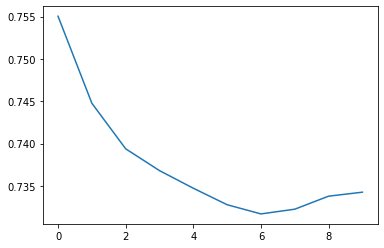

In [48]:
backpropagation(train_set, w1, w2, w3, b1, b2, b3)
accuracy = feedforward(train_set[:200], w1, w2, w3, b1, b2, b3)  # to calculate accuracy


print("accuracy =", accuracy)
plt.plot([x for x in range(number_of_epochs)], total_cost)
plt.show()

€å⁄© ŸÜŸÖŸàŸÜŸá ÿÆÿ±Ÿàÿ¨€å ÿßÿ¨ÿ±ÿß:

executian time: 1m 32s

accuracy: 26.5


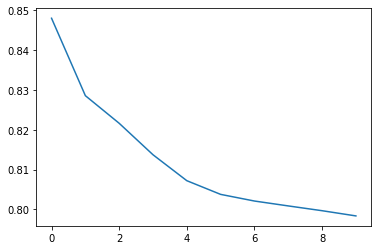

# Vectorization



ÿ®ÿ±ÿß€å ÿß€åŸÜ⁄©Ÿá ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ ÿ≥ÿ±€åÿπ‚Äåÿ™ÿ± ÿ¥ŸàÿØÿå ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ Ÿæ€åÿßÿØŸá ÿ≥ÿßÿ≤€å ÿ¥ÿØŸá ÿØÿ± ŸÖÿ±ÿ≠ŸÑŸá ŸÇÿ®ŸÑ ÿ±ÿß ÿ®Ÿá ÿµŸàÿ±ÿ™€å ŸÖ€å‚ÄåŸÜŸà€åÿ≥€åŸÖ ⁄©Ÿá ÿßÿ≤ ÿπŸÖŸÑ€åÿßÿ™ ŸÖÿßÿ™ÿ±€åÿ≥€å ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿ¥ŸàÿØ. ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß ⁄©Ÿá ÿπŸÖŸÑ€åÿßÿ™ ÿ®ÿ± ÿ±Ÿà€å ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß ŸÖ€å‚Äåÿ™ŸàÿßŸÜŸÜÿØ ÿ®Ÿá ÿµŸàÿ±ÿ™ ŸáŸÖÿ≤ŸÖÿßŸÜ ÿßŸÜÿ¨ÿßŸÖ ÿ¥ŸàŸÜÿØÿå ÿ≥ÿ±ÿπÿ™ ÿßÿ¨ÿ±ÿß ÿ±ÿß ÿßŸÅÿ≤ÿß€åÿ¥ ŸÖ€å‚ÄåÿØŸáŸÜÿØ. ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ ŸÖÿßŸÜŸÜÿØ ŸÇÿ®ŸÑ ÿßÿ≥ÿ™ ŸÅŸÇÿ∑ ÿ®Ÿá ÿ¨ÿß€å ÿ≠ŸÑŸÇŸá ÿ≤ÿØŸÜ ÿ±Ÿà€å ŸáŸÖŸá‚Äå€å ÿØÿ±ÿß€åŸá‚ÄåŸáÿß€å ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿßÿå ÿßÿ≤ ÿ∂ÿ±ÿ® Ÿà ÿ¨ŸÖÿπ ŸÖÿßÿ™ÿ±€åÿ≥€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ

ÿØÿ± ŸÜŸáÿß€åÿ™ Ÿáÿ≤€åŸÜŸá Ÿà ÿ≤ŸÖÿßŸÜ ÿßÿ¨ÿ±ÿß€å ÿ™ÿßÿ®ÿπ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖ€å‚Äåÿ¥ŸàÿØ. ÿßÿ≤ ÿ¢ŸÜÿ¨ÿß ⁄©Ÿá ŸÖ€å‚ÄåÿÆŸàÿßŸá€åŸÖ ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿ±ÿß ⁄ÜŸÜÿØ€åŸÜ ÿ®ÿßÿ± ÿßÿ¨ÿ±ÿß ⁄©ŸÜ€åŸÖÿå Ÿáÿ≤€åŸÜŸá Ÿà ÿ≤ŸÖÿßŸÜ ÿßÿ¨ÿ±ÿß Ÿà ŸÖ€åÿ≤ÿßŸÜ ÿØŸÇÿ™ ÿ±ÿß ÿØÿ± €å⁄© ŸÑ€åÿ≥ÿ™ ÿ∞ÿÆ€åÿ±Ÿá Ÿà ÿØÿ± ŸÜŸáÿß€åÿ™ ŸÜ€åÿ≤ ŸÜŸÖŸàÿØÿßÿ± Ÿáÿ≤€åŸÜŸá ÿ±ÿß ÿ±ÿ≥ŸÖ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ

In [49]:
def vectorization(train_set, w1, w2, w3, b1, b2, b3, size_of_modeling):
  start_time = time.time()
  total_cost = []
  correct_guesses = 0  # to calculate the accuracy

  for i in range(number_of_epochs):
    batches = [train_set[x: x+batch_size] for x in range(0, size_of_modeling, batch_size)]
    for batch in batches:
      grad_w1 = np.zeros((16, 1024))
      grad_w2 = np.zeros((16, 16))
      grad_w3 = np.zeros((4, 16))

      grad_b1 = np.zeros((16,1))
      grad_b2 = np.zeros((16,1))
      grad_b3 = np.zeros((4,1))

      for image, label in batch:
        # fist we do forward propagation
        a1 = output(w1, image, b1)  # a1(16,1)
        a2 = output(w2, a1, b2)  # a2(16, 1)
        a3 = output(w3, a2, b3)  # a3(4, 1)

        # computation of output layer
        grad_w3 += 2 * (a3 - label) * a3 * (1 - a3) @ np.transpose(a2)
        grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)

        # hidden layer 2
        grad_a2 = np.zeros((16, 1))
        grad_a2 += np.transpose(w3) @ (2 * (a3 - label) * a3 * (1 - a3))
        grad_w2 +=  grad_a2 * a2 * (1 - a2) @ np.transpose(a1)
        grad_b2 += grad_a2 * a2 * (1 - a2)

        # hidden layer 1
        grad_a1 = np.zeros((16,1))
        grad_a1 += np.transpose(w2) @ (grad_a2 * a2 * (1 - a2))
        grad_w1 += grad_a1 * a1 * (1 - a1) @ np.transpose(image)
        grad_b1 += grad_a1 * a1 * (1 - a1)
      
      w1 -= learning_rate * (grad_w1 / batch_size)
      w2 -= learning_rate * (grad_w2 / batch_size)
      w3 -= learning_rate * (grad_w3 / batch_size)

      b1 -= learning_rate * (grad_b1 / batch_size)
      b2 -= learning_rate * (grad_b2 / batch_size)
      b3 -= learning_rate * (grad_b3 / batch_size)

    
    # calculate cost
    cost = 0
    for data in train_set[:size_of_modeling]:
      a1 = output(w1, data[0], b1)
      a2 = output(w2, a1, b2)
      a3 = output(w3, a2, b3)
      
      # cost
      for j in range(4):
        cost += np.power((a3[j, 0] - data[1][j, 0]), 2)
    
    cost /= size_of_modeling
    total_cost.append(cost)

  execution_duration = time.time() - start_time
  execution_times.append(execution_duration)
  print("execution time = %s seconds" %"{:.2f}".format(execution_duration))

  accuracy = feedforward(train_set[:size_of_modeling], w1, w2, w3, b1, b2, b3)  # to calculate accuracy
  total_accuracy.append(accuracy)
  print("accuracy =", accuracy)


  plt.plot([x for x in range(number_of_epochs)], total_cost)
  plt.ylabel("cost")
  plt.xlabel("epoch")

  

Ÿáÿß€åŸæÿ±Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß Ÿà ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ÿßŸàŸÑ€åŸá ÿ±ÿß ŸÖŸÇÿØÿßÿ±ÿØŸá€å ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ. ÿ∑ÿ®ŸÇ ÿÆŸàÿßÿ≥ÿ™Ÿá ÿØÿ≥ÿ™Ÿàÿ±⁄©ÿßÿ±ÿå ÿØŸá ÿ®ÿßÿ± ÿ™ÿßÿ®ÿπ Ÿà⁄©ÿ™Ÿàÿ±€åÿ≤€åÿ¥ŸÜ ÿµÿØÿß ÿ≤ÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ ÿ™ÿß ÿØŸÇÿ™ Ÿà Ÿáÿ≤€åŸÜŸá Ÿà ÿ≤ŸÖÿßŸÜ ÿßÿ¨ÿ±ÿß ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿØÿ± ÿØŸá ÿ®ÿßÿ± ÿßÿ¨ÿ±ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ¥ŸàÿØ. ŸÑÿßÿ≤ŸÖ ÿßÿ≥ÿ™ ŸÇÿ®ŸÑ ÿßÿ≤ Ÿáÿ± ÿ®ÿßÿ± ÿßÿ¨ÿ±ÿß ŸÖÿßÿ™ÿ±€åÿ≥ Ÿàÿ≤ŸÜ‚ÄåŸáÿß Ÿà ÿ®ÿß€åÿßÿ≥‚ÄåŸáÿß ŸÖŸÇÿØÿßÿ±ÿØŸá€å ÿßŸàŸÑ€åŸá ÿ®ÿ¥ŸàŸÜÿØ ÿ™ÿß ÿ¨Ÿàÿßÿ® ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ ÿµÿ≠€åÿ≠ ÿ®ÿßÿ¥ÿØ. 

in 10 executions of vectorization:
1 :
execution time = 1.44 seconds
accuracy = 38.0
2 :
execution time = 1.46 seconds
accuracy = 45.0
3 :
execution time = 1.43 seconds
accuracy = 42.5
4 :
execution time = 1.44 seconds
accuracy = 46.0
5 :
execution time = 1.40 seconds
accuracy = 46.5
6 :
execution time = 1.41 seconds
accuracy = 48.5
7 :
execution time = 1.46 seconds
accuracy = 43.0
8 :
execution time = 1.38 seconds
accuracy = 49.5
9 :
execution time = 1.42 seconds
accuracy = 45.5
10 :
execution time = 1.40 seconds
accuracy = 48.5

average accuracy = 45.3
average cost = 73.76
average execution time = 1.42


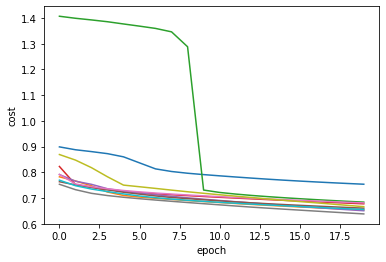

In [50]:
batch_size = 16
learning_rate = 0.3
number_of_epochs = 20


total_accuracy = []
execution_times = []

number_of_execution = 10

print("in %s executions of vectorization:" % number_of_execution)
for i in range(number_of_execution):
  w1 = np.random.normal(size=(16, 1024))
  w2 = np.random.normal(size=(16,16))
  w3 = np.random.normal(size=(4,16))

  b1 = np.zeros((16, 1))
  b2 = np.zeros((16, 1))
  b3 = np.zeros((4, 1))
  print(i+1,":") 
  vectorization(train_set, w1, w2, w3, b1, b2, b3, 200)


avg_accuracy = np.sum(total_accuracy) / len(total_accuracy)

print("\naverage accuracy =", avg_accuracy)
print("average cost = %s" %"{:.2f}".format((np.sum(total_cost) / len(total_cost) * 100)))
print("average execution time = %s" %"{:.2f}".format(np.sum(execution_times) / len(execution_times)))


ÿÆÿ±Ÿàÿ¨€å €å⁄© ŸÜŸÖŸàŸÜŸá ÿßÿ¨ÿ±ÿß:

average accuracy = 43.15

average cost = 72.90

average execution time = 1.56

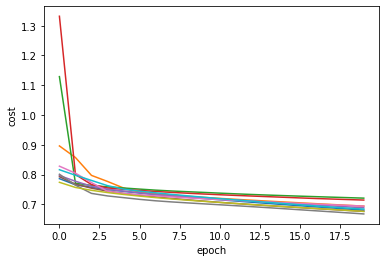

ÿ≠ÿßŸÑ ÿ±Ÿà€å ÿØ€åÿ™ÿß€å ÿ®€åÿ¥ÿ™ÿ±€å ÿ¢ŸÖŸàÿ≤ÿ¥ ÿµŸàÿ±ÿ™ ŸÖ€å‚Äå⁄Ø€åÿ±ÿØ. ÿ™ÿπÿØÿßÿØ ÿß€åŸæÿß⁄©‚ÄåŸáÿß ÿ±ÿß €¥€∞ ⁄Øÿ∞ÿßÿ¥ÿ™Ÿá Ÿà ÿ±Ÿà€å €∏€∞€∞€∞ ÿØÿßÿØŸá €åÿßÿØ⁄Ø€åÿ±€å ÿµŸàÿ±ÿ™ ŸÖ€å‚Äå⁄Ø€åÿ±ÿØ. ⁄©ŸÑ€åÿßÿ™ ÿßÿ¨ÿ±ÿß ŸÖÿßŸÜŸÜÿØ ÿ®ÿÆÿ¥ ŸÇÿ®ŸÑ€å ÿßÿ≥ÿ™ Ÿà ŸÅŸÇÿ∑ ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ®€åÿ¥ÿ™ÿ± ÿ¥ÿØŸá ÿßÿ≥ÿ™ ÿ™ÿß ŸÖÿØŸÑ ÿØŸÇ€åŸÇ‚Äåÿ™ÿ± ÿ¥ŸàÿØ

in 10 executions of vectorization on 8000 data of training data:
1 :
execution time = 109.63 seconds
accuracy = 56.06250000000001
2 :
execution time = 110.17 seconds
accuracy = 54.65
3 :
execution time = 109.77 seconds
accuracy = 53.574999999999996
4 :
execution time = 109.92 seconds
accuracy = 53.2125
5 :
execution time = 110.62 seconds
accuracy = 51.425
6 :
execution time = 110.74 seconds
accuracy = 56.074999999999996
7 :
execution time = 109.86 seconds
accuracy = 54.862500000000004
8 :
execution time = 111.02 seconds
accuracy = 57.3125
9 :
execution time = 110.93 seconds
accuracy = 55.125
10 :
execution time = 109.33 seconds
accuracy = 56.137499999999996

average accuracy = 54.84375
average cost = 73.76
average execution time = 110.20


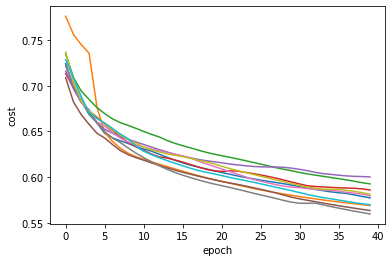

In [51]:
batch_size = 16
learning_rate = 0.3
number_of_epochs = 40

total_accuracy = []
execution_times = []

number_of_execution = 10

print("in %s executions of vectorization on 8000 data of training data:" % number_of_execution)
for i in range(number_of_execution):
  w1 = np.random.normal(size=(16, 1024))
  w2 = np.random.normal(size=(16,16))
  w3 = np.random.normal(size=(4,16))

  b1 = np.zeros((16, 1))
  b2 = np.zeros((16, 1))
  b3 = np.zeros((4, 1))
  print(i+1,":") 
  vectorization(train_set, w1, w2, w3, b1, b2, b3, 8000)


avg_accuracy = np.sum(total_accuracy) / len(total_accuracy)
print("\naverage accuracy =", avg_accuracy)
print("average cost = %s" %"{:.2f}".format((np.sum(total_cost) / len(total_cost) * 100)))
print("average execution time = %s" %"{:.2f}".format(np.sum(execution_times) / len(execution_times)))



€å⁄© ŸÜŸÖŸàŸÜŸá ÿÆÿ±Ÿàÿ¨€å:

average accuracy = 56.9

average cost = 84.01

average execution time = 125.88

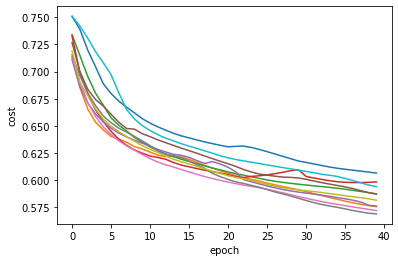

ÿ≠ÿßŸÑ ⁄©Ÿá ÿ™ÿß ÿ≠ÿØ ÿÆŸàÿ®€å ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ±Ÿà€å ŸÖÿØŸÑ ÿµŸàÿ±ÿ™ ⁄Øÿ±ŸÅÿ™Ÿá ÿßÿ≥ÿ™ÿå ÿ±Ÿà€å €¥€∞€∞€∞ ÿØÿßÿØŸá ÿ™ÿ≥ÿ™ ÿßÿ¨ÿ±ÿß ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ Ÿà ÿØŸÇÿ™ Ÿà ÿ≤ŸÖÿßŸÜ ÿßÿ¨ÿ±ÿß Ÿà Ÿáÿ≤€åŸÜŸá ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ±ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá Ÿà ŸÜŸÖŸàÿØÿßÿ± Ÿáÿ≤€åŸÜŸá ÿ±ÿß ÿ±ÿ≥ŸÖ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ

in 10 executions of vectorization on 4000 data of test data:
1 :
execution time = 54.60 seconds
accuracy = 50.949999999999996
2 :
execution time = 54.98 seconds
accuracy = 51.65
3 :
execution time = 54.76 seconds
accuracy = 49.875
4 :
execution time = 54.79 seconds
accuracy = 51.125
5 :
execution time = 54.87 seconds
accuracy = 49.925000000000004
6 :
execution time = 54.82 seconds
accuracy = 50.74999999999999
7 :
execution time = 54.76 seconds
accuracy = 53.075
8 :
execution time = 54.92 seconds
accuracy = 52.2
9 :
execution time = 54.76 seconds
accuracy = 53.27499999999999
10 :
execution time = 54.26 seconds
accuracy = 52.25

average accuracy = 51.50749999999999
average cost = 73.76
average execution time = 54.75


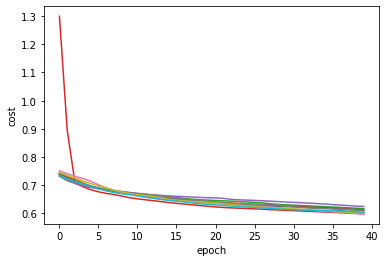

In [52]:
batch_size = 16
learning_rate = 0.3
number_of_epochs = 40

total_accuracy = []
execution_times = []

number_of_execution = 10

print("in %s executions of vectorization on 4000 data of test data:" % number_of_execution)
for i in range(number_of_execution):
  w1 = np.random.normal(size=(16, 1024))
  w2 = np.random.normal(size=(16,16))
  w3 = np.random.normal(size=(4,16))

  b1 = np.zeros((16, 1))
  b2 = np.zeros((16, 1))
  b3 = np.zeros((4, 1))
  print(i+1,":") 
  vectorization(test_set, w1, w2, w3, b1, b2, b3, 4000)


avg_accuracy = np.sum(total_accuracy) / len(total_accuracy)
print("\naverage accuracy =", avg_accuracy)
print("average cost = %s" %"{:.2f}".format((np.sum(total_cost) / len(total_cost) * 100)))
print("average execution time = %s" %"{:.2f}".format(np.sum(execution_times) / len(execution_times)))



ÿÆÿ±Ÿàÿ¨€å €å⁄© ŸÜŸÖŸàŸÜŸá ÿ±ÿßŸÜ ÿ¥ÿØŸá:

average accuracy = 52.11

average cost = 83.55

average execution time = 55.54

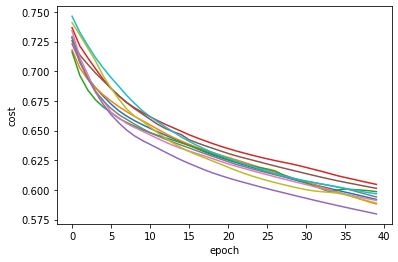

ÿ±ŸàŸÜÿØ ŸÜÿ≤ŸàŸÑ€å ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß ŸáŸÖÿßŸÜ ⁄Ü€åÿ≤€å ÿßÿ≥ÿ™ ⁄©Ÿá ÿßŸÜÿ™ÿ∏ÿßÿ± ÿØÿßÿ¥ÿ™€åŸÖ ÿ¥ÿ®⁄©Ÿá ÿπÿµÿ®€å ÿ®ÿß €åÿßÿØ⁄Ø€åÿ±€å ÿ®€åÿ¥ÿ™ÿ± ŸÜÿ™€åÿ¨Ÿá ÿØŸáÿØ